In [1]:
import numpy as np
import time

In [2]:
with open("input_16.txt", "r") as fh:
    grid = np.array([[c for c in r.strip()] for r in fh.readlines()])

In [3]:
def pretty_print(grid):
    # Pretty print
    for r in grid:
        if grid.dtype == "float64":
            r = [str(int(i))+"\t" if i>=0 else "#\t" for i in r]
        print(''.join(r))
    print()

def graphic_print(grid):
    # Pretty print
    for r in grid:
        if grid.dtype == "float64":
            r = [". " if i>=0 else "# " for i in r]
        print(''.join(r))
    print()

def all_rotations(h):
    # Get the 2 possible single 90 degree rotations (list of tuples)
    rotations = []
    rotations.append((abs(h[0])-1, abs(h[1])-1))
    rotations.append((-(abs(h[0])-1), -(abs(h[1])-1)))
    return rotations

In [4]:
# 16a
# State: tuple of position (tuple) and heading (unit-tuple)
initial_state = (tuple(np.array(np.where(grid == "S")).transpose()[0]), (0, 1))
# Keep best score per state to avoid memory issues
scores = {initial_state: 0}
# Keep track of states to test, finished when no more states left (either hitting a wall, reaching E or not improving score anymore)
current_states = [initial_state]
# Keep track of number of turns
num_turns = {initial_state: 0}

t0 = time.time()
best_score = 1e9
best_num_turns = 0
counter = 0
MAX_COUNTER = 1000
while len(current_states) and counter < MAX_COUNTER:
    new_states = []
    for cs in current_states:
        # Option 1: move step in current heading
        new_pos = (cs[0][0]+cs[1][0], cs[0][1]+cs[1][1])
        if grid[new_pos] != "#":
            new_score = scores[cs] + 1
            new_cs = (new_pos, cs[1])
            if new_cs not in scores or (new_cs in scores and new_score < scores[new_cs]):
                scores[new_cs] = new_score
                num_turns[new_cs] = num_turns[cs]
                if grid[new_pos] != "E":
                    new_states.append(new_cs)
                elif new_score < best_score:
                    best_score = new_score
                    best_num_turns = num_turns[cs]
        
        # Option 2: rotate 90 degrees in both possible directions
        for h in all_rotations(cs[1]):
            new_score = scores[cs] + 1000
            new_cs = (cs[0], h)
            if new_cs not in scores or (new_cs in scores and new_score < scores[new_cs]):
                scores[new_cs] = new_score
                num_turns[new_cs] = num_turns[cs] + 1
                new_states.append(new_cs)
    current_states = new_states.copy()
            
    counter += 1
best_num_straights = best_score - 1000*best_num_turns
print(f"16a: {best_score} (with {best_num_turns} turns and {best_num_straights} straights) in {time.time() - t0} sec.")
assert counter != MAX_COUNTER, "You reached the end on the counter. Maybe increase MAX_COUNTER?"

16a: 102488 (with 102 turns and 488 straights) in 0.11397409439086914 sec.


In [5]:
# 16b
# Find all valid branches and keep track of them until they 1) are invalid (e.g., score too large, or no next step possible), 
# or 2) turn out to be optimal (i.e., reach the end with the right score)
t0 = time.time()
nodes = set()
branches = [[(initial_state, 0)]] # Format: branch=list(nodes), node = ((pos, heading), score)
best_states = {} # Format k=(pos, heading), v=score
end_loc = tuple(np.array(np.where(grid == "E")).transpose()[0])

while len(branches):
    new_branches = []
    for branch in branches:
        state, score = branch[-1]
        loc, heading = state
        if score == best_score and loc == end_loc:
            # Store only locations
            nodes = nodes.union(b[0][0] for b in branch)
            continue
        
        # Option 1: move step in current heading
        new_loc = (loc[0]+heading[0], loc[1]+heading[1])
        new_state = (new_loc, heading)
        if grid[new_loc] != "#":
            new_score = score + 1
            if new_score <= best_score and ((new_state in best_states and best_states[new_state] >= new_score) or (new_state not in best_states)):
                best_states[new_state] = new_score
                new_branches.append(branch + [(new_state, new_score)])
        
        # Option 2: rotate 90 degrees in both possible directions
        for h in all_rotations(heading):
            new_score = score + 1000
            new_state = (loc, h)
            if new_score <= best_score and ((new_state in best_states and best_states[new_state] >= new_score) or (new_state not in best_states)):
                best_states[new_state] = new_score
                new_branches.append(branch + [(new_state, new_score)])
        
    branches = new_branches.copy()
print(f"16b: {len(nodes)} in {time.time() - t0} sec.")

16b: 559 in 6.197046279907227 sec.


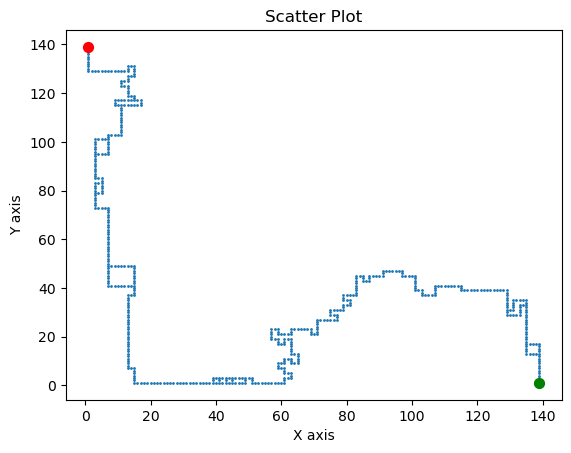

In [6]:
# Visualization used for debugging
import matplotlib.pyplot as plt
%matplotlib inline

# Create some sample data
x, y = [n[0] for n in nodes], [n[1] for n in nodes]
x_start, y_start = np.where(grid == "S")
x_end, y_end = np.where(grid == "E")

# Create the scatter plot
plt.scatter(x, y, s=1)
plt.scatter(x_start, y_start, s=50, c='green')
plt.scatter(x_end, y_end, s=50, c='red')

# Add labels and title (optional)
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Scatter Plot')

# Display the plot
plt.show()